# 创建分类器

### 1 简单分类器

In [1]:
import numpy as np
import matplotlib.pyplot as plt

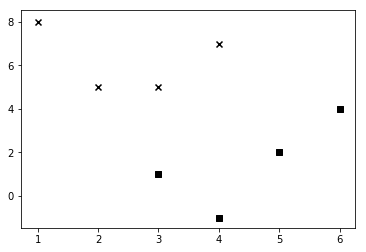

In [2]:
# 创建样本数据与标签
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]

# 标记与分类
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

# 可视化
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')

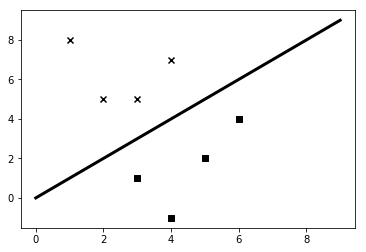

In [3]:
line_x = range(10)
line_y = line_x

plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)
plt.show()

### 2 建立Logistic回归分类器

虽然这里出现了回归这个词，但逻辑回归其实是一种分类方法。给定一组数据点，需要建立一个可以在类之间绘制线性边界的模型。逻辑回归就可以对训练数据派生的一组方程进行求解来提取边界。

In [4]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# 创建样本数据
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]], dtype='float64')
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [5]:
# 初始化逻辑回归分类器

classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

> 前面的函数有一些输入参数需要设置，但是最重要的两个参数是solver和C。参数solver用于设置求解系统方程的算法类型，参数C表示正则化强度，数值越小，表示正则化强度越高。

In [6]:
# 训练分类器

classifier.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
def plot_classifier(classifier, X, y):
    # 定义图形的取值范围
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    
    # 设置网格数据的步长
    step_size = 0.01
    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
    np.arange(y_min, y_max, step_size))
    
    # 计算分类器输出结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    # 数组维度变形
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # 用彩图画出分类结果
    plt.figure()
    # 选择配色方案
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    # 将训练数据点画在图上
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1,
cmap=plt.cm.Paired)
    
    # 设置图形的取值范围
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # 设置X轴与Y轴
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    plt.show()

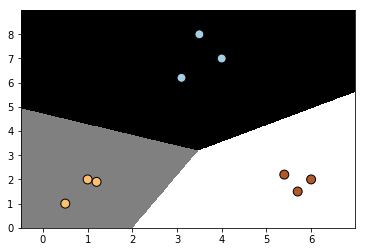

In [8]:
plot_classifier(classifier, X, y)

### 3 建立朴素贝叶斯分类器

朴素贝叶斯分类器是用贝叶斯定理进行建模的监督学习分类器。下面看看如何建立一个朴素贝叶斯分类器。

In [9]:
from sklearn.naive_bayes import GaussianNB
# from logistic_regression import plot_classifier

In [10]:
X = []
y = []
with open('../data/classic/data_multivar2.txt', 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
        
X = np.array(X)
y = np.array(y)

In [11]:
# 建立朴素贝叶斯分类器

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

> GaussianNB函数指定了正态分布朴素贝叶斯模型（Gaussian Naive Bayes model）。

In [12]:
# 计算分类器的准确性

accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.5 %


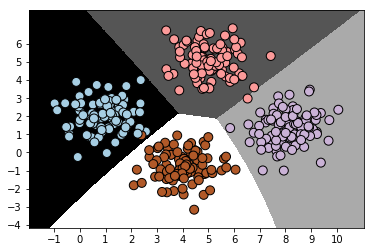

In [13]:
# 画出数据点和边界

plot_classifier(classifier_gaussiannb, X, y)

### 4 分割数据集为训练集和测试集

In [14]:
from sklearn.model_selection import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
# 用分类器对测试数据进行测试

y_test_pred = classifier_gaussiannb_new.predict(X_test)

In [16]:
# 计算分类器的准确性

accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 98.0 %


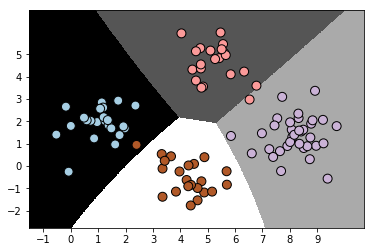

In [17]:
plot_classifier(classifier_gaussiannb_new, X_test, y_test)

### 5 用交叉验证检验模型准确性

交叉验证是机器学习的重要概念。在上一节中，我们把数据分成了训练数据集和测试数据集。然而，为了能够让模型更加稳定，还需要用数据集的不同子集进行反复的验证。如果只是对特定的子集进行微调，最终可能会过度拟合（overfitting）模型。过度拟合是指模型在已知数据集上拟合得超级好，但是一遇到未知数据就挂了。我们真正想要的，是让机器学习模型能够适用于未知数据。

* 性能指标

当处理机器学习模型时，通常关心3个指标：精度（precision）、召回率（recall）和F1得分（F1 score）。可以用参数评分标准（parameter scoring）获得各项指标的得分。精度是指被分类器正确分类的样本数量占分类器总分类样本数量百分比（分类器分类结果中，有一些样本分错了）。召回率是指被应正确分类的样本数量占某分类总样本数量的百分比（有一些样本属于某分类，但分类器却没有分出来）。

一个给力的机器学习模型需要同时具备良好的精度和召回率。这两个指标是二律背反的，一个指标达到100%，那么另一个指标就会非常差！我们需要保持两个指标能够同时处于合理高度。为了量化两个指标的均衡性，引入了F1得分指标，是精度和召回率的合成指标，实际上是精度和召回率的调和均值（harmonic mean）：

<center>F1 得分＝2×精度×召回率 / (精度＋召回率)</center>

In [18]:
# 计算精度

num_validations = 5
accuracy = cross_val_score(classifier_gaussiannb, X, y,scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

Accuracy: 99.5%


In [19]:
# 分别计算精度、召回率和F1得分

f1 = cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_validations)
print("F1: " + str(round(100*f1.mean(), 2)) + "%")

precision = cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_validations)
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

recall = cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted', cv=num_validations)
print("Recall: " + str(round(100*recall.mean(), 2)) + "%")

F1: 99.5%
Precision: 99.52%
Recall: 99.5%
